### Import Libraries

In [187]:
import matplotlib.pyplot as plt
import pandas as pd

### Load data

In [188]:
apartment_data = pd.read_csv("apartment_data.csv")
apartment_data

,location,bedrooms,bathrooms,price
0,"\nNyari, Westlands\n",2.0,\n2\n,225000
1,"\n1, Ruaka Rd, Runda, Westlands\n",3.0,\n4\n,260000
2,"\nkabiria, Dagoretti Corner\n",1.0,\n1\n,17000
3,"\nwestlands, Westlands Area, Westlands\n",2.0,\n3\n,260000
4,"\nwestlands, Westlands Area, Westlands\n",3.0,\n4\n,360000
...,...,...,...,...
3059,"\nkileleshwa, Kilimani\n",3.0,\n3\n,110000
3060,\nThika Road\n,3.0,\n3\n,120000
3061,\nKiambu Road\n,3.0,\n3\n,75000
3062,"\nNyali Area, Nyali\n",3.0,\n4\n,180000


### Data Cleanup

In [189]:
def wrangle(df: pd.DataFrame):
    # remove new lines from location data and set the type to string
    df["location"] = (
        df["location"]
        .str.split(",")
        .str[-1]
        .astype(str)
        .str.lower()
        .str.lstrip()
        .str.rstrip()
    )
    # set bathroom data to int and replace n/a with 0
    df["bathrooms"] = df["bathrooms"].str.strip().str[0].fillna(0).astype(int)
    # set bedroom data to int and replace n/a with 0
    df["bedrooms"] = df["bedrooms"].fillna(0).astype(int)

    return df

In [190]:
clean_apartment_data = wrangle(apartment_data)
print(clean_apartment_data.dtypes)
clean_apartment_data.head()

location     object
bedrooms      int64
bathrooms     int64
price         int64
dtype: object


,location,bedrooms,bathrooms,price
0,westlands,2,2,225000
1,westlands,3,4,260000
2,dagoretti corner,1,1,17000
3,westlands,2,3,260000
4,westlands,3,4,360000


### Explore the data

In [191]:
unique_locations = clean_apartment_data["location"].value_counts()
unique_locations.count()

68

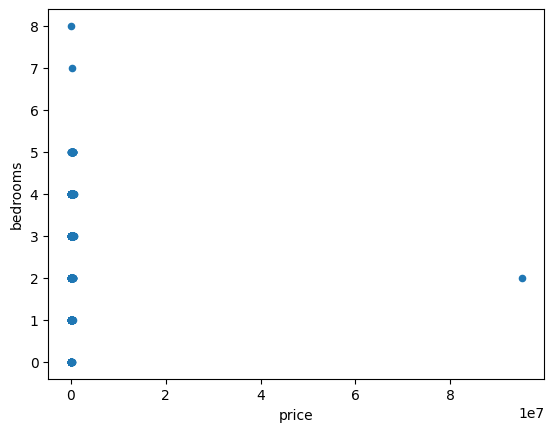

In [193]:
bedrooms_price_scatter_plot = clean_apartment_data.plot.scatter(
    x="price", y="bedrooms"
)